# 2.7 積分計算

## 2.7.2 多変数関数の数値積分
ガウス積分(Gaussian integral)

In [ ]:
using PyPlot

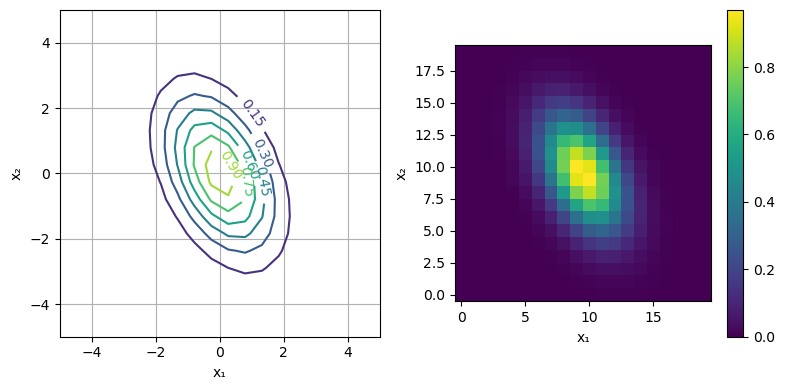

In [2]:
# 積分対称の２変数関数
D = 2
A = [0.5 0.3
     0.3 1.0]
f₂(x) = exp(-0.5 * x' * A * x)

# 20x20の区画に分割
L = 20
xs₁ = range(-5, 5, length=L)
xs₂ = range(-5, 5, length=L)

fig, axes = subplots(1, 2, figsize=(8,4))

# 等高線図で可視化
cs = axes[1].contour(repeat(xs₁, 1, L), repeat(xs₂', L, 1), [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs)
axes[1].grid()
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")

# カラー表示
cs = axes[2].imshow([f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂], origin="lower")
fig.colorbar(cs)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")

tight_layout()

In [6]:
function approx_integration_2dim(x_range, f)
    # 幅
    Δ = x_range[2] - x_range[1]
    # 近似された面積と幅を返す
    sum([f₂([x₁, x₂]) * Δ^2 for x₁ in x_range, x₂ in x_range]), Δ
end

approx_integration_2dim (generic function with 1 method)

In [8]:
# det関数を使うためにLinearAlgebraパッケージを使用
using LinearAlgebra

# 20x20の区画に分割
L = 20
x_range = range(-5, 5, length=L)

# 積分近似の実行
approx, Δ = approx_integration_2dim(x_range, f₂)

# 近似値(approx)と厳密値(exact)の比較
println("approx = $(approx)")
println("exact  = $(sqrt((2*pi)^D/det(A)))")

approx = 9.805714174433021
exact  = 9.812686860654528


In [9]:
# 1000x1000の区画に分割
L = 1000
x_range = range(-100, 100, length=L)

# 積分近似の実行
approx, Δ = approx_integration_2dim(x_range, f₂)

# 近似値(approx)と厳密値(exact)の比較
println("approx = $(approx)")
println("exact  = $(sqrt((2*pi)^D/det(A)))")

approx = 9.812686860654521
exact  = 9.812686860654528
